In [1]:
# Прянишников Александр
# Решения прошли все тесты, как и в коде, так и в гриндере

<center>
<img src="logo.png" height="900"> 
</center>


#  Логи магазина

В файле `walmart.csv` нам предоставлены исторические данные о продажах магазинов Walmart, расположенных в разных регионах.

Нам доступны следующие переменные:

* **Date** – дата;
* **Store** – номер магазина;
* **Dept** – номер отдела;
* **Weekly_Sales** – объём продаж в данную неделю в данном отделе
* **Type** – тип магазина;
* **Size** – размер магазина;
* **IsHoliday** – является ли неделя праздничной;
* **Temperature** – средняя температура в регионе в градусах по Фаренгейту;
* **Fuel_Price** – стоимость топлива в регионе;
* **MarkDown1-5** – данные, связанные с рекламными уценками, которые запускает Walmart. Данные уценки доступны только после ноября 2011 года и доступны не для всех магазинов. Данные анонимизированы. Непонятно на какие именно товары производилась уценка и в каких количествах. Компании часто анонимизируют данные, когда выкладывают их в открытый доступ.
* **CPI** – индекс потребительских цен;
* **Unemployment** – уровень безработицы.

__а)__ Подгрузите все необходимые для работы библиотеки.

In [2]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# your code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

__б)__ Загрузите файл с данными. Отобразите первые и последние 5 наблюдений. Выведите на экран тип колонок. Приведите колонку `Date` к формату даты. В переменную `ans1` запишите число строк, которое есть в таблице. 

In [3]:
df = pd.read_csv("data/walmart.csv")

In [4]:
df.head()

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,2010-02-05,1,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2010-02-12,1,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,2010-02-19,1,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,2010-02-26,1,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,2010-03-05,1,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [5]:
df.tail()

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
418234,45,2012-09-21,98,467.30,False,B,118221,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,191.856704,8.684
418235,45,2012-09-28,98,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
418236,45,2012-10-05,98,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
418237,45,2012-10-12,98,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
418238,45,2012-10-19,98,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667


In [6]:
df.Date = pd.to_datetime(df["Date"], format = "%Y-%m-%d")

In [7]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

ans1 = df.shape[0]

# your code here


In [8]:
print(ans1)

418239


In [9]:
# проверка, что задание решено корректно
assert ans1 > 418000

# Подобные тесты скрыты от вас 

__в)__ Разберитесь с пропущенными переменными: 

- Выведите на экран, сколько пропущенных значений в процентах есть в каждой переменной.
- Визуализируйте пропуски с помощью функции `sns.heatmap`. Не надо рисовать картинку сразу для всего датасета. На визуализации нам хочется посмотреть на то, как пропуски в разных переменных соотносятся друг с другом. Отберите случайные $10\%$ наблюдений из исходной таблички методом `.sample( )` и визуализируйте их. 
- Запишите в переменную `ans2` число переменных, которые имеют более $60\%$ пропусков.
- Удалите эти переменные из набора данных.

In [10]:
indexes = df.apply(lambda x: x.isnull().sum() / df.shape[0] * 100)

In [11]:
# Каждому столбцу соответствует значение пропущенных значений в процентах
indexes

Store            0.000000
Date             0.000000
Dept             0.000000
Weekly_Sales     0.000000
IsHoliday        0.000000
Type             0.000000
Size             0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       64.736909
MarkDown2       74.143014
MarkDown3       67.825095
MarkDown4       68.363782
MarkDown5       64.570019
CPI              0.000000
Unemployment     0.000000
dtype: float64

In [12]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

ans2 = indexes[indexes > 60].index.values.shape[0]

# your code here


In [13]:
print(ans2)

5


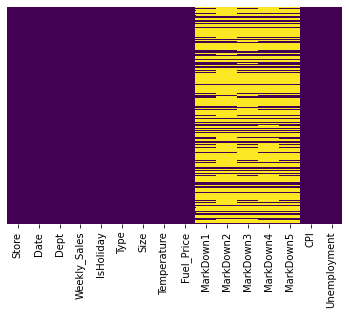

In [14]:
sns_heatmap = sns.heatmap(df.sample(1000).isnull(), 
                          yticklabels=False, 
                          cbar=False, 
                          cmap='viridis')

In [15]:
# Как видно, пропуски только в колонках MarkDown[i]

In [16]:
df = df[indexes[indexes < 60].index.values]

In [17]:
# проверка, что задание решено корректно
assert ans2 > 4
assert ans2 < 10

# Подобные тесты скрыты от вас 

__г)__ Сколько уникальных магазинов есть в данных? Запишите их число в переменную `ans3`. Сколько уникальных отделов есть в данных? Запишите их число в переменную `ans4`. За какой диапазон у нас присутствуют данные? Запишите этот диапазон, выраженный в числе дней, в переменную `ans5`. 

In [18]:
df.head()

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1,24924.50,False,A,151315,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1,46039.49,True,A,151315,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1,41595.55,False,A,151315,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1,19403.54,False,A,151315,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1,21827.90,False,A,151315,46.50,2.625,211.350143,8.106


In [19]:
(df.Date.max() - df.Date.min()).days

987

In [20]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

ans3 = df.Store.unique().shape[0]
ans4 = df.Dept.unique().shape[0]
ans5 = (df.Date.max() - df.Date.min()).days

# your code here


In [21]:
print(ans3, ans4, ans5)

45 81 987


In [22]:
# проверка, что задание решено корректно
assert ans3 < 50
assert ans4 > 80
assert ans5 > 900

# Подобные тесты скрыты от вас 

__д)__ Посмотрим на динамику продаж в магазинах в целом. Для этого построим график, где по оси $x$ будет отложена дата, а по оси $y$ продажи по всей сети Walmart. Обязательно подпишите у графика оси. В какой день наблюдаются максимальные продажи? Запишите дату этого дня в переменную `ans6` в формате `год-месяц-день`.

Насколько хорошо идут дела у магазинов? Есть ли в динамике продаж какие-то интересные особенности? Как думаете, с чем они связаны? 

In [23]:
df.head()

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1,24924.50,False,A,151315,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1,46039.49,True,A,151315,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1,41595.55,False,A,151315,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1,19403.54,False,A,151315,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1,21827.90,False,A,151315,46.50,2.625,211.350143,8.106


In [24]:
df_cell = df[["Date", "Weekly_Sales"]].groupby('Date').agg('sum')

Text(0.5, 1.0, 'Продажи в Walmart')

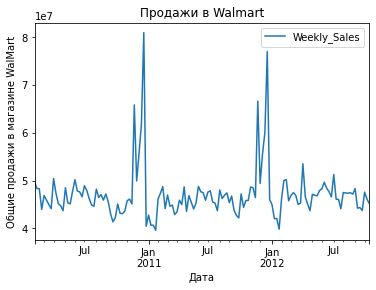

In [25]:
df_cell.plot()
plt.xlabel("Дата")
plt.ylabel("Общие продажи в магазине WalMart")
plt.title("Продажи в Walmart")

In [26]:
# Видно, что максимальные продажи были где-то перед Новым годом 2011

In [27]:
df_cell[df_cell["Weekly_Sales"] == df_cell["Weekly_Sales"].max()].index.values[0].astype(str)[:10]

'2010-12-24'

In [28]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

ans6 = df_cell[df_cell["Weekly_Sales"] == df_cell["Weekly_Sales"].max()].index.values[0].astype(str)[:10]

# your code here


In [29]:
# проверка, что задание решено корректно
assert ans6.split('-')[-1] == '24'

# Подобные тесты скрыты от вас 

__е)__ Найдите и нарисуйте матрицу корреляции для числовых показателей. Какие два показателя коррелируют сильнее всего? Запишите модуль получившегося значения в переменную `ans7` (корреляция мб отрицательной). 

При строительстве матрицы не надо брать в расчёт номер магазина, номер отдела и размер магазина, так как их взаимосвязь с другими показателями не имеет никакого смысла.

Обратите отдельное внимание на знак корреляции между безработицей (Unemployment) и индексом потребительских цен (CPI). Про него в конце тетрадки вас ждёт отдельная история.

In [30]:
df.head()

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1,24924.50,False,A,151315,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1,46039.49,True,A,151315,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1,41595.55,False,A,151315,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1,19403.54,False,A,151315,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1,21827.90,False,A,151315,46.50,2.625,211.350143,8.106


In [31]:
df_corr = df[["Date", "Weekly_Sales", "IsHoliday", "Type", "Temperature", "Fuel_Price", "CPI", "Unemployment"]]

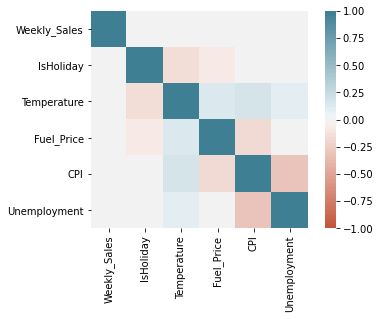

In [32]:
corr = df_corr.corr()
sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

In [33]:
# Видно, что максимальная корреляция у последних двух строк (по модулю)

In [34]:
df_corr.corr().replace(1, 0).apply(lambda x: abs(x)).max().max()

0.2997230218737895

In [35]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

ans7 = df.corr().replace(1, 0).apply(lambda x: abs(x)).max().max()

# your code here


Постройте между этими же переменными облака рассеивания методом `sns.pairplot`. Не надо строить эту визуализацию сразу же для всех точек, которые есть в данных. Отберите случайные $10\%$ наблюдений для картинки с помощью метода `.sample( )`.

- Как думате, между какими переменными в данных присутствует нелинейная взаимосвязь? 
- Как думаете, какое распределение у цен? Как бы вы его нормализовали, если бы вам это понадобилось? 

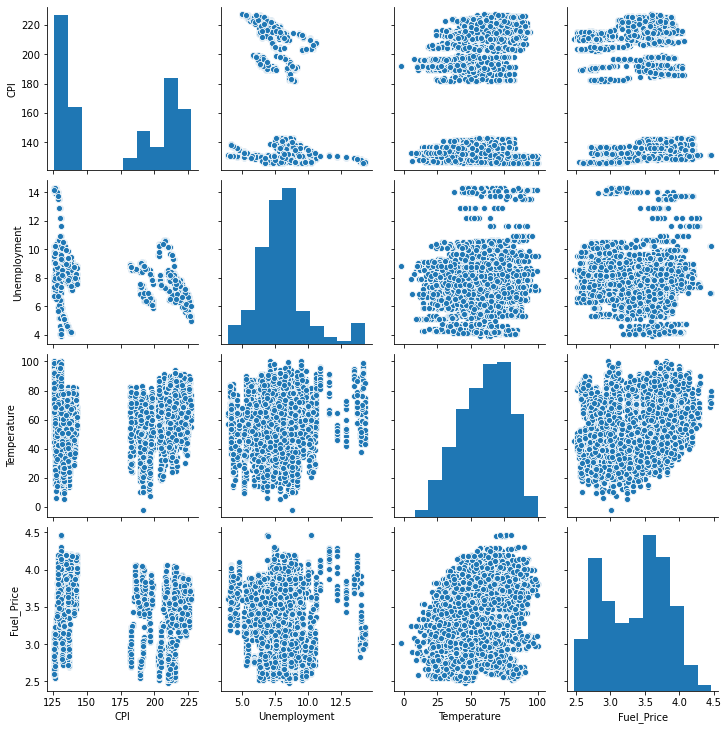

In [36]:
X = df.sample(frac = 0.1)[["CPI", "Unemployment", "Temperature", "Fuel_Price"]]
sns.pairplot(X)

In [37]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# your code here


In [38]:
# проверка, что задание решено корректно
assert ans7 > 0.2
assert ans7 < 0.35

# Подобные тесты скрыты от вас 

__ё)__  Найдите топ-5 самых больших магазинов по суммарным продажам за все время и отобразите динамику их продаж на одном графике. Правда ли, что пик продаж у них происходит примерно в одно время? Как думаете, с чем связан этот пик? 

In [39]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

df_buy = df[['Weekly_Sales', 'Store']].groupby('Store').agg('sum')
index = df_buy.sort_values(by = "Weekly_Sales", ascending = False)[:5].index.values

# your code here


In [40]:
df_most =  (
    df[(df['Store'] == index[0]) | (df['Store'] == index[1]) | (df["Store"] == index[2]) |
  (df['Store'] == index[3]) | (df['Store'] == index[4])]
)

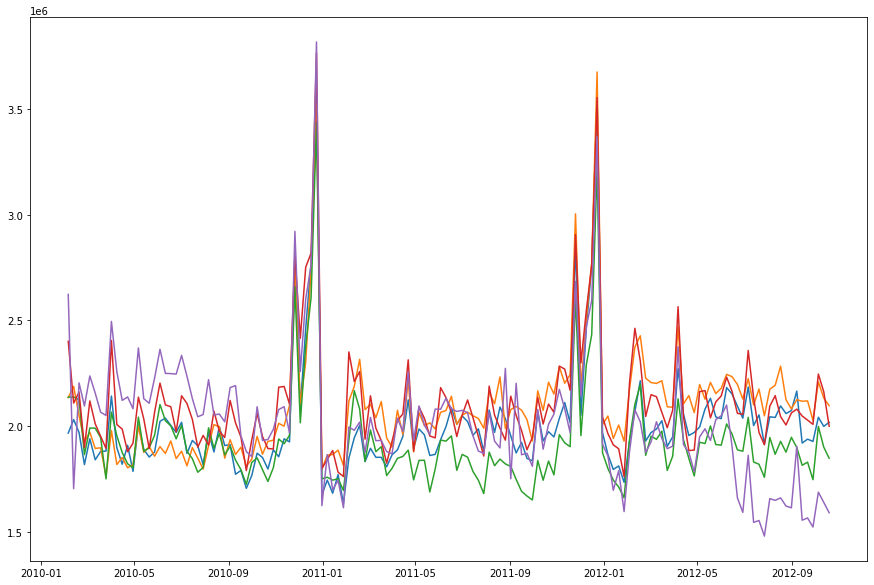

In [41]:
plt.figure(figsize = (15, 10))
for Store in df_most.Store.value_counts().index:
    temp = df_most[df_most["Store"] == Store][["Date", "Weekly_Sales"]].groupby('Date').agg('sum').sort_index()
    plt.plot(temp)

__ж)__ Найдите топ-10 самых больших отделов по суммарным продажам за 2011 год среди магазинов с типом А и нарисуйте столбчатую диаграмму для них.

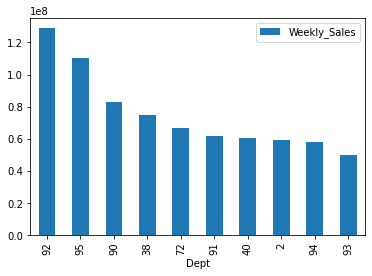

In [42]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

df['Year'] = df['Date'].apply(lambda x: x.year)
df2011 = df[(df.Year == 2011) & (df.Type == 'A')]
(
df2011[["Dept", "Weekly_Sales"]]
 .groupby('Dept')
 .agg('sum')
 .sort_values(by = "Weekly_Sales", ascending = False)[:10]
 .plot(kind = 'bar')
)
# your code here


# Бонусная история про анализ данных и ошибки, которые мы при нём совершаем

Помните, когда мы смотрели на корреляционную матрицу, мы увидели, что между безработицей и инфляцией есть отрицательная взаимосвязь: чем больше безработица, тем ниже инфляция. В экономике эта взаимосвязь называется кривой Филиппса. И за ней кроется очень интересная история из целой плеяды ошибок. Давайте попробуем научиться на чужих ошибках чему-нибудь новому. 

В $1958$ году была опубликована статья экономиста Филиппса, в которой он обнаружил достаточно чёткую отрицательную связь между инфляцией и безработицей в Англии за прошедшие $70$ лет. Проверка этой работы на американских данных подтвердила наличие взаимосвязи. Так родилась знаменитая кривая Филиппса. Её стали интерпретировать как некую возможность выбора между высокой инфляцией и высокой безработицей. Нужно сократить безработицу? Давайте напечатаем денег и разгоним инфляцию!

Любому политику безработица кажется более значимой социальной проблемой, нежели инфляция, и он хочет её победить любыми доступными средствами. Самым популярным средством по борьбе с безработицей является агрессивная монетарная политика, которая состоит в расширении денежной массы. Грубо говоря, просто печатают ещё денег. Именно это и было сделано президентом США Ричардом Никсоном в начале $1970$-х гг. в ходе погони за низкой безработицей и высокой инфляцией.

К сожалению, план Никсона удался только наполовину, он добился высокой инфляции, но сбить безработицу не смог. В краткосрочном периоде она действительно упала, но через некоторое время вернулась назад. Кривая Филиппса в этот период времени исчезла из данных. Никакой взаимосвязи между безработицей и инфляцией больше не прослеживалось.

В течение $70$-х все Западные страны поэкспериментировали с кривой Филиппса. В конечном итоге, $1980$-е годы были потрачены на обуздание разогнанной инфляции. Победа над инфляцией обошлась довольно дорого. Например, Пол Волкер, возглавлявший в этот период времени ФРС США, взвинтил процентную ставку до $19\%$. Высокие ставки отправили экономику в рецессию. Такая жёсткая принципиальная политика ФРС позволила сбить инфляционные ожидания.

__Какова мораль этой истории?__ Политики увидели в данных закономерность, но начав бороться с безработицей, печатая деньги, немного перепутали причину и следствие. На самом деле никакой чёткой отрицательной зависимости между инфляцией и безработицей в природе не существует. Её наличие в данных является следствием сложного взаимодействия между экономическими агентами. Политики пытавшись воздействовать на следствие, а не на причину, из-за этого у них не получилось достичь своих целей.

Не путайте причину и следствие, когда смотрите в данные и помните, что работа с ними малость сложнее, чем кажется на первый взгляд.